In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import re
import pandas as pd

In [3]:
with open("articles.json", "r") as f:
    articles = json.load(f)

In [4]:
articles

[{'article_url': 'https://www.heise.de/news/Telekom-und-Apple-starten-Augmented-Reality-Innovationsprogramm-6147126.html',
  'number_comments': 0,
  'date': '07-26-2021, 16:01',
  'brandig': ['Mac & i'],
  'related_topics': ['5G',
   'Apple',
   'Augmented Reality',
   'Deutsche Telekom',
   'Innovation',
   'iOS',
   'iPhone',
   'Mobilfunk',
   'Startups',
   'Wettbewerb'],
  'authors': ['Ben Schwan'],
  'heading': 'Telekom und Apple starten Augmented-Reality-Innovationsprogramm',
  'lead': 'Im Rahmen des Start-up-Inkubators "Hubraum" können sich Entwickler in sechs Kategorien bewerben, um Apples AR-Technik mit 5G und Co. zu kombinieren.',
  'atricle_text': 'Die Deutsche Telekom AG hat zusammen mit ihrer US-Tochter T-Mobile sowie Apple ein Innovationsprogramm für Augmented Reality (AR) aufgelegt. Die Kampagne läuft im Rahmen des Telekom-Inkubators Hubraum mit Sitz in Deutschland und ist international angelegt. Bewerbungen sind noch bis zum 4. August möglich, danach wird es für die in

# Seperate Analyse jedes heruntergeladenen Feldes

## number_comments

In [5]:
number_comments_list = [article["number_comments"] for article in articles]
number_comments_np = np.array(number_comments_list)

### Verteilung

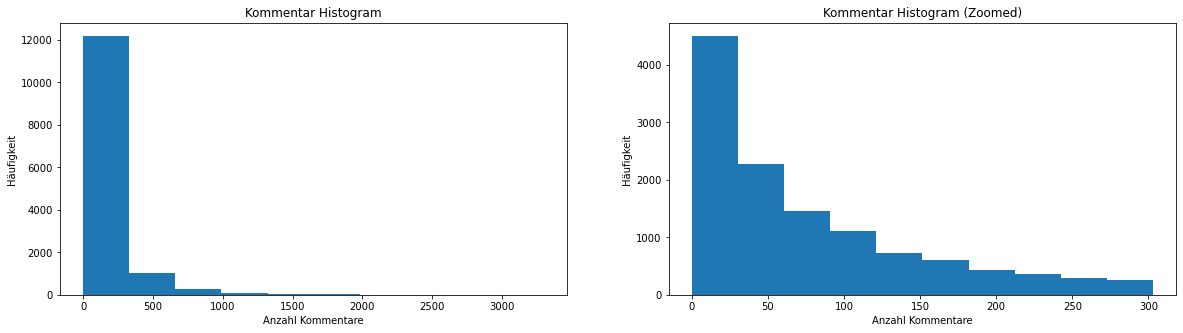

In [6]:
f = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.hist(number_comments_np)
plt.xlabel('Anzahl Kommentare')
plt.ylabel('Häufigkeit')
plt.title('Kommentar Histogram')
plt.subplot(1, 2, 2)
plt.hist(np.sort(number_comments_np)[:12000])
plt.xlabel('Anzahl Kommentare')
plt.ylabel('Häufigkeit')
plt.title('Kommentar Histogram (Zoomed)')
plt.show(f)

In [7]:
np.mean(number_comments_np)

134.31538405106008

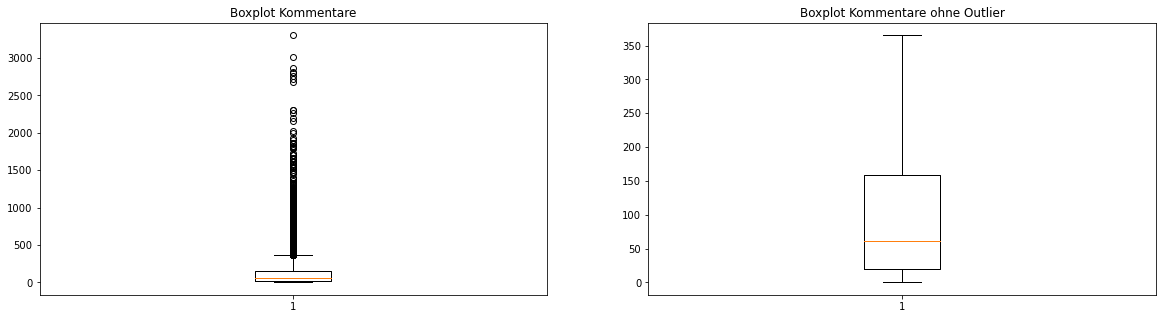

In [8]:
f = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.boxplot(number_comments_np)
plt.title('Boxplot Kommentare')
plt.subplot(1, 2, 2)
plt.boxplot(number_comments_np,showfliers=False)
plt.title('Boxplot Kommentare ohne Outlier')
plt.show(f)

### Meist diskutierte Artikel 🚗

In [9]:
for idx in reversed(np.argsort(number_comments_np)[-5:]):
    print(f"Anzahl Kommentare {articles[idx]['number_comments']}")
    print(f"Überschrift \"{articles[idx]['heading']}\"")
    print(f"Datum {articles[idx]['date']}")
    print()

Anzahl Kommentare 3302
Überschrift "Bundestag lehnt Tempolimit 130 auf Autobahnen und Nulltarif im ÖPNV ab"
Datum 10-18-2019, 07:34

Anzahl Kommentare 3007
Überschrift "Tempolimit: Verbände fordern Tempolimit auf Autobahnen und Tempo 30 innerorts"
Datum 02-12-2020, 14:06

Anzahl Kommentare 2870
Überschrift "Kommentar: Tempolimit "gegen jeden Menschenverstand"? So, so ..."
Datum 01-25-2019, 06:20

Anzahl Kommentare 2813
Überschrift "Kommentar: Der Mercedes EQC ist eine rollende Provokation"
Datum 09-07-2018, 07:16

Anzahl Kommentare 2803
Überschrift "BMW: Europäer wollen keine Elektroautos kaufen"
Datum 06-29-2019, 18:20



### Artikel ohne Kommentare

In [11]:
np.count_nonzero(number_comments_np==0)

457

## date

In [ ]:
number_comments_list = [article["number_comments"] for article in articles]
number_comments_np = np.array(number_comments_list)

### Artikel pro Jar

Seit 2003 wurden in der Rubrik Wirtschaft Artikel veröffentlicht, allerdings erst ab 2017 mit erhöhter Häufigkeit (> 2000). Seit 2017 steigt die Anzahl der publizierten Artikel (2021 bei bereits der Hälfte des Jahres ca. so viele Artikel wie 2017).

In [38]:
articles_year = {}
for article in articles:
    date = article["date"]
    date = datetime.strptime(date, "%m-%d-%Y, %H:%M")
    articles_year[date.year] = articles_year.get(date.year,0) + 1

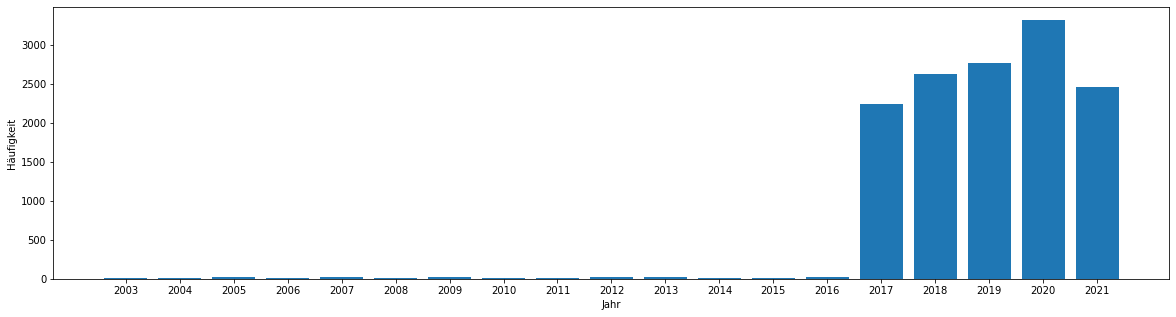

In [60]:
plt.figure(figsize=(20,5))
plt.bar(range(len(articles_year)), list(articles_year.values()), align='center')
plt.xticks(range(len(articles_year)), list(articles_year.keys()))
plt.xlabel('Jahr')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

### Artikel nach Monat (ohne 2021)
Im Juli werden am meisten Artikel veröffenlticht (ca. 200 mehr als der Durchschnitt).<br>
Im Februar werden am wenigsten Artikel veröffenlticht (ca. 170 weniger als der Durchschnitt).

In [78]:
articles_mo = {}
for article in articles:
    date = article["date"]
    date = datetime.strptime(date, "%m-%d-%Y, %H:%M")
    if date.year != 2021:
        articles_mo[date.strftime("%B")] = articles_mo.get(date.strftime("%B"),0) + 1

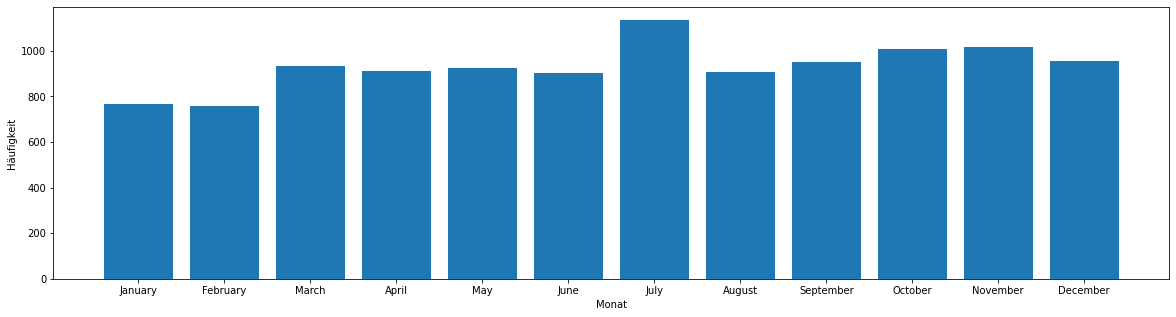

In [85]:
plt.figure(figsize=(20,5))
plt.bar(range(len(articles_mo)), list(articles_mo.values()), align='center')
plt.xticks(range(len(articles_mo)), list(articles_mo.keys()))
plt.xlabel('Monat')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

In [80]:
articles_mo["July"] - np.mean(list(articles_mo.values()))

204.5

In [81]:
np.mean(list(articles_mo.values())) - articles_mo["February"]

173.5

### Artikel nach Stunde (ohne 2021)

Artikel werden gewöhnlich zwischen 6 und 19 Uhr veröffenlticht. Um 10 Uhr werden am meisten Artikel veröffenlicht.

In [95]:
articles_hour = {}
for article in articles:
    date = article["date"]
    date = datetime.strptime(date, "%m-%d-%Y, %H:%M")
    if date.year != 2021:
        articles_hour[date.hour] = articles_hour.get(date.hour,0) + 1
articles_hour = {key: value for (key, value) in sorted(articles_hour.items(), key=lambda x: x[0], reverse=True)}

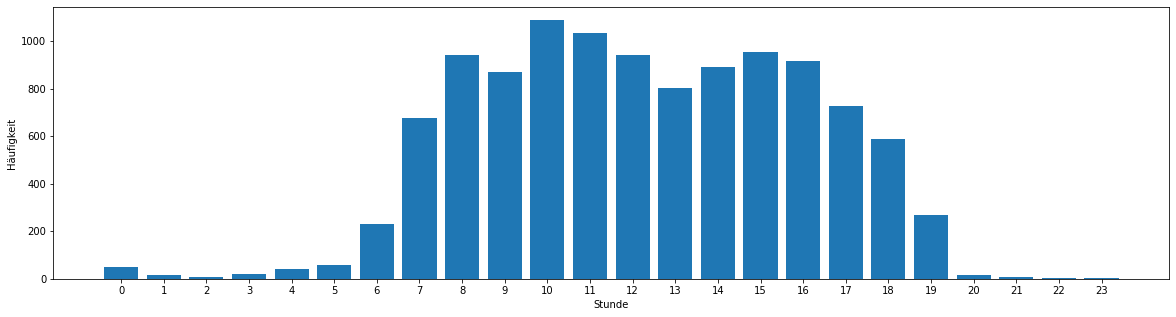

In [96]:
plt.figure(figsize=(20,5))
plt.bar(range(len(articles_hour)), list(articles_hour.values()), align='center')
plt.xticks(range(len(articles_hour)), list(articles_hour.keys()))
plt.xlabel('Stunde')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

## branding

Es gibt insgesamt 10 verschiedene Tags (Ein Artikel kann nur ein Tag haben; gibt das jeweilige Heise Magazin an). Nur ca. 17% (2715) aller Artikel besitzen ein Tag. Die Tags "Mac & i" und "Autos" treten mit 1012 am häufigsten auf, während das Tag 'Telepolis' nur einmal auftritt.

In [107]:
tags = [tag for article in articles for tag in article["brandig"]]

In [111]:
print(len(set(tags)))
set(tags)

10


{'Autos',
 'Developer',
 'MIT Technology Review',
 'Mac & i',
 'Make',
 'Security',
 'Telepolis',
 "c't Fotografie",
 "c't Magazin",
 'iX Magazin'}

In [115]:
print(f"Anzahl Artikel ohne Tags: {len(articles) - len(tags)}")
print(f"Anzahl Artikel mit Tags: {len(tags)}")
print(f"Anteil Artikel mit Tags: {len(tags)/(len(articles) + len(tags))}")

Anzahl Artikel ohne Tags: 10916
Anzahl Artikel mit Tags: 2715
Anteil Artikel mit Tags: 0.16609568090052612


In [120]:
tag_frequencies = {}
for tag in tags:
    tag_frequencies[tag] = tag_frequencies.get(tag,0)+1
tag_frequencies = {key: value for (key, value) in sorted(tag_frequencies.items(), key=lambda x: x[1], reverse=True)}

In [122]:
tag_frequencies

{'Mac & i': 1012,
 'Autos': 1012,
 'MIT Technology Review': 288,
 'iX Magazin': 197,
 "c't Magazin": 93,
 'Developer': 57,
 'Security': 37,
 "c't Fotografie": 12,
 'Make': 6,
 'Telepolis': 1}

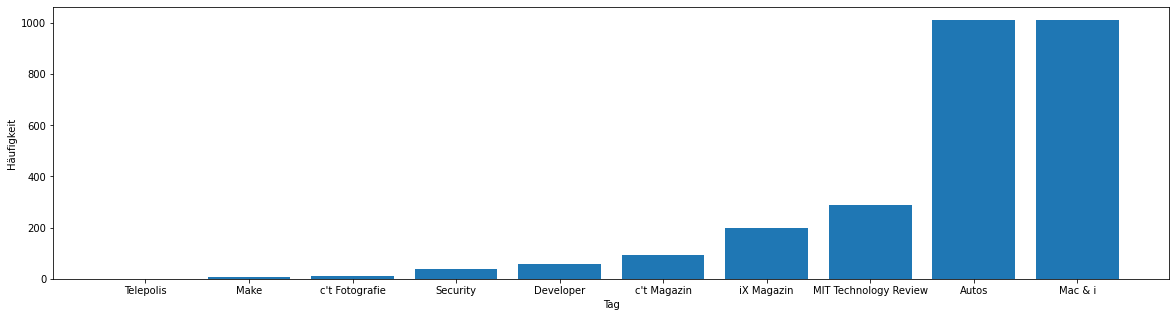

In [121]:
plt.figure(figsize=(20,5))
plt.bar(range(len(tag_frequencies)), list(tag_frequencies.values()), align='center')
plt.xticks(range(len(tag_frequencies)), list(tag_frequencies.keys()))
plt.xlabel('Tag')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

## related topics

Ein Artikel kann mehrere related topics, oder auch gar kein related topic haben. Bei ca. 7,5 % fehlt der Eintrag. Es gibt insgesamt 913 verschiedene related topics, wobei "Elektromobilität" die häufigste ist und in insgesamt 11,5 % der Artikel auftaucht.

In [4]:
related_topics = [article["related_topics"] for article in articles]

In [5]:
counter=0
# Wie viele leere Elemente sind in der Liste? 
for topic in related_topics:
    if not topic:
        counter += 1
print('Anzahl der Einträge insgesammt:',len(related_topics) ,'Anzahl der leeren Einträge:',counter)   

Anzahl der Einträge insgesammt: 13631 Anzahl der leeren Einträge: 1043


In [6]:
related_topics_freq = {}
for topics in related_topics:
    for topic in topics:
        related_topics_freq[topic] = related_topics_freq.get(topic, 0) + 1

In [7]:
topics_df = pd.DataFrame(related_topics_freq.items(),columns=['topic_name','frequency'])
topics_df = topics_df.sort_values(by='frequency',ascending=False)
topics_df["rel_frequency_article"] = topics_df["frequency"]/len(articles)
topics_df

topic_name  frequency  rel_frequency_article
25   Elektromobilität       1562               0.114592
24        Elektroauto       1299               0.095297
1               Apple       1203               0.088255
37    Geschäftszahlen        747               0.054802
44        Coronavirus        723               0.053041
..                ...        ...                    ...
802           Groupon          1               0.000073
688              IPv6          1               0.000073
513     Wahlmaschinen          1               0.000073
805             DeNIC          1               0.000073
912           Web 2.0          1               0.000073

[913 rows x 3 columns]

<AxesSubplot:xlabel='topic_name'>

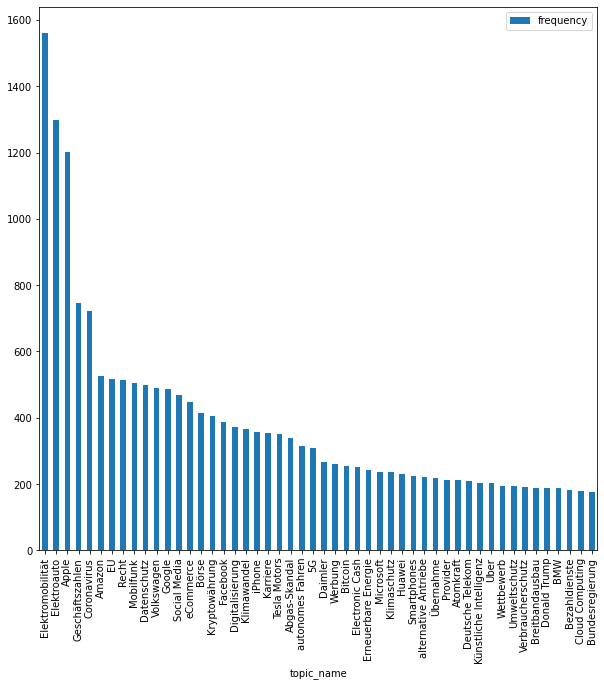

In [8]:
topics_df.head(50).plot(kind='bar',x = "topic_name",y='frequency',figsize=(10,10))

### Veränderung der Topics in verschiedenen Jahren

Man erkennt sehr gut, dass die Themen Elektromobilität, Elektoauto, Apple und Geschäftszahlen (im Jahr 2021 auf Platz 7) in allen Jahren eine sehr große Bedeutung gespielt haben. Zusätzlich gibt es weiteren Themen die jeweils in verschiedenen Jahren eine Rolle gespielt haben:

    - 2017 EU
    - 2018 Abgas-Skandal
    - 2019 Mobilfunk
    - 2020 Coronavirus
    - 2021 Coronavirus, Klimawandel

In [9]:
year_topic = [[datetime.strptime(article["date"], "%m-%d-%Y, %H:%M").year, topic] for article in articles for topic in article["related_topics"]]
year_topic = pd.DataFrame(year_topic, columns=["year","topic"])

In [59]:
year_topic_freq_df = year_topic.groupby(['year','topic']).size().groupby('year', group_keys=False).nlargest(5).reset_index(name="frequency")
# Nur die Jahre 2017 bis 20201
year_topic_freq_df = year_topic_freq_df[year_topic_freq_df.year.isin(range(2017,2022))]

In [60]:
year_topic_freq_pivot = year_topic_freq_df.pivot(index="year",columns="topic", values="frequency")
#Sortieren nach NaN Werten, um besseren Barplot zu erhalten
year_topic_freq_pivot = year_topic_freq_pivot[year_topic_freq_pivot.isnull().sum().sort_values(ascending=True).index]

[]

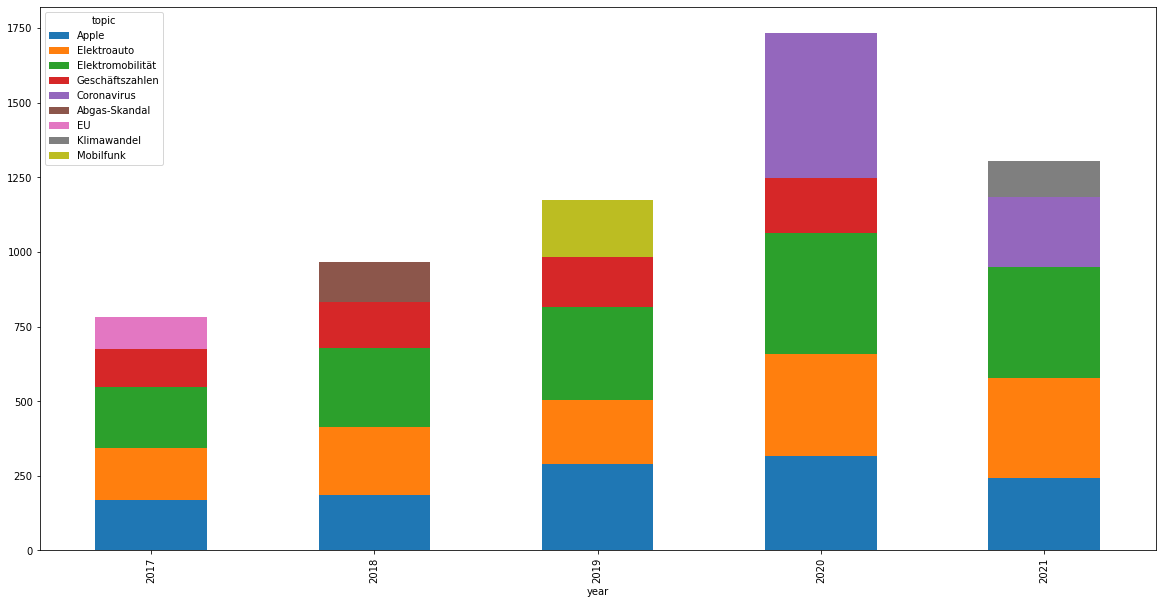

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
#order = ['Elektromobilität','Elektroauto', 'Apple','Geschäftszahlen','EU','Abgas-Skandal', 'Mobilfunk', 'Coronavirus', 'Klimawandel']
year_topic_freq_pivot.plot.bar(stacked=True, ax=ax)
plt.plot()

## authors

### clean
Manchmal durch "und" oder "," und nicht als neues Listenelement

In [14]:
authors_article = [article["authors"] for article in articles]

In [15]:
for i, authors in enumerate(authors_article):
    tmp_elem = []
    for author_s in authors:
        tmp_elem += re.split(',| und |;', author_s)
        
    authors_article[i] = [author.strip() for author in tmp_elem]

In [16]:
authors = [author for authors in authors_article for author in authors]
set(authors)

{'',
 '-Korrespondenten',
 '. Felix Frieler',
 'Achim Barczok',
 'Achim Born',
 'Achim Kampker',
 'Aitziber Romero Bengoetxea',
 'Aleksandra Bakmaz',
 'Alexander Neumann',
 'Alexander Poth',
 'Alexander Spier',
 'Alexander Sturm',
 'Alexander Welscher',
 'Alexandra Kleijn',
 'Alexia Angelopoulou',
 'Alkimos Sartoros',
 'Anatoli Kreyman',
 'Andrea Löbbecke',
 'Andrea Trinkwalder',
 'Andreas Heimann',
 'Andreas Hitzig',
 'Andreas Hoenig',
 'Andreas Knie',
 'Andreas Knobloch',
 'Andreas Landwehr',
 'Andreas Rabenstein',
 'Andreas Schuchardt',
 'Andreas Stiller',
 'Andreas Wilkens',
 'Andrej Sokolow',
 'André Kramer',
 'André von Raison',
 'Angela Froitzheim',
 'Angela Meyer',
 'Angelika Engler',
 'Anika von Greve-Dierfeld',
 'Anja Garms',
 'Anja Semmelroch',
 'Anka Hakert',
 'Anna Ringle',
 'Anne Pollmann',
 'Anne-Béatrice Clasmann',
 'Anne-Marie Corley',
 'Anne-Sophie Galli',
 'Annika Grah',
 'Ansgar Haase',
 'Anton Weste',
 'Antonio Regalado',
 'Anwen Roberts',
 'Ariane Rüdiger',
 'Arne

Entfernen von '', '-Korrespondenten'

dpa, heise 


### authors per article

In [31]:
authors_df = pd.DataFrame(authors,columns=['author_name'])

In [200]:
df = authors_df.groupby(['author_name']).size()
df = df.to_frame()
df = df.rename(columns={0:"number_articles"})
sorted_df = df.sort_values(by='number_articles',ascending=False)
sorted_df.head(10)

number_articles
author_name                       
dpa                           4647
Andreas Wilkens               1556
Stefan Krempl                  844
Ben Schwan                     711
Volker Briegleb                560
Axel Kannenberg                508
Oliver Bünte                   473
Daniel AJ Sokolov              354
Martin Holland                 311
Leo Becker                     249

<AxesSubplot:ylabel='Verteilung der geschriebenen Artikel auf die 20 wichtigsten Autoren'>

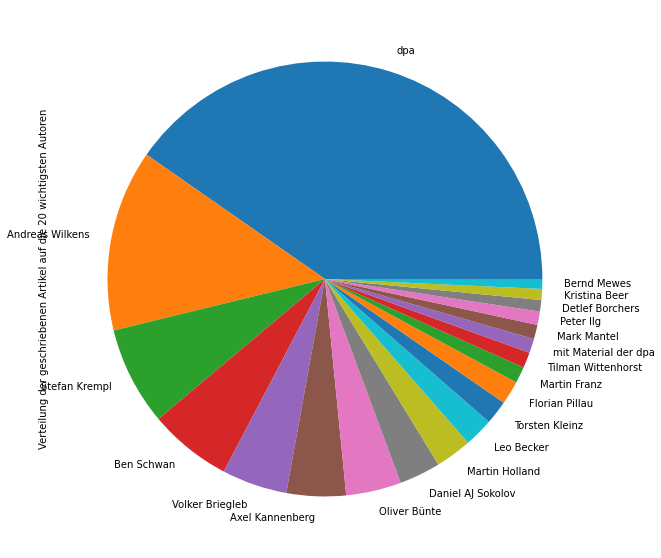

In [201]:
df = authors_df.groupby(['author_name']).size()
df_relevant=df.sort_values(axis=0, ascending= False).head(20)
df_relevant.plot(kind='pie', y='df',figsize=(10,10), label= 'Verteilung der geschriebenen Artikel auf die 20 wichtigsten Autoren')

Mit Material der dpa? Muss wahrscheinlich entfernt werden. 
Zu welchen Kategorien schreiben die wichtigsten Autoren? 

In [79]:
topics_authors = [[article["related_topics"], article["authors"]] for article in articles] 

In [81]:
topics_authors[1]

[['Zulieferer'], ['dpa']]

In [93]:
df = pd.DataFrame(topics_authors,columns=['topic','author_name'])
df

topic  \
0      [5G, Apple, Augmented Reality, Deutsche Teleko...   
1                                           [Zulieferer]   
2                                            [Raumfahrt]   
3      [Apple, iOS, iPad, iPhone, Snapchat, Social Me...   
4                                  [Halbleiterindustrie]   
...                                                  ...   
13626                                                 []   
13627                                                 []   
13628                                                 []   
13629                                                 []   
13630                                                 []   

                                 author_name  
0                               [Ben Schwan]  
1                                      [dpa]  
2                           [Martin Holland]  
3                               [Ben Schwan]  
4                                      [dpa]  
...                                      ...  
13626                       [Bruce Sterling]  
13627             [Sonia Shinde, Max Rauner]  
13628  [Claire Tristram, Michael Fitzgerald]  
13629            [Astrid Dähn, Thomas Vasek]  
13630        [Christian Just, Sascha Mattke]  

[13631 rows x 2 columns]

### related_topics

## heading

In [62]:
import advertools as adv
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

In [63]:
heading_article = [article["heading"] for article in articles]

In [86]:
dataset = ' '.join(map(str,heading_article))
dataset

'Telekom und Apple starten Augmented-Reality-Innovationsprogramm Linke plant Investitionsprogramm für klimagerechtere Autozulieferindustrie Neue Regeln für Weltraumflug: Keine Astronautenschwingen für Jeff Bezos & Co. Snapchat: Haben wenig Probleme mit Apples App-Tracking-Transparenz Rohstoffmangel setzt der Industrie zu – und trifft die Verbraucher Chiphersteller TSMC erwägt Bau einer Chipfabrik in Deutschland Ein Monat Reparaturbonus in Thüringen: Rund 1000 Geräte geflickt Unfälle, Defekte, Wechselwirkungen: Mehr als ein Stromausfall pro Tag in Berlin Einfach, schnell, bequem? Die Probleme beim E-Auto-Ladenetz Missing Link: Wie sich China zur Normungsweltmacht aufschwingen will Rekordjagd an der Wall Street – Snap treibt Social-Media-Aktien an IG Metall: Mit emissionsfreiem Küstenverkehr Werften sichern Amazon löscht 200 Millionen falsche Bewertungen Northvolt-Chef: Europa braucht 15 Fabriken für E-Auto-Batterien Apple nimmt DOS-Emulator aus dem App Store Bundeskartellamt prüft Anmel

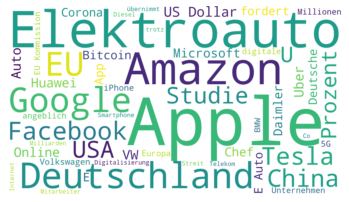

In [69]:
stopwords = adv.stopwords['german']

STOPWORDS.update(stopwords)
wordcloud = WordCloud(background_color="white",width=1920, height=1080, max_words=50).generate(dataset)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bild besser noch etwas größer

In [83]:
words = 0
for i, heading in enumerate(heading_article):
    result = len(heading.split())
    words = words + result
    
words_average = words/len(heading_article)
print('Durschnittliche Länge der Headings:',words_average)

Durschnittliche Länge der Headings: 7.358814467023696


In [93]:
# remove stopwords, and numbers, and anything that's not alphanumeric or underscore
pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
text = pattern.sub('', dataset)
text = re.sub(r'[^\w]', ' ', text)
newtext = re.sub(r'[0-9]+', '', text)
print(newtext)

Telekom Apple starten Augmented Reality Innovationsprogramm Linke plant Investitionsprogramm klimagerechtere Autozulieferindustrie Neue Regeln Weltraumflug  Keine Astronautenschwingen Jeff Bezos   Co  Snapchat  Haben Probleme Apples App Tracking Transparenz Rohstoffmangel setzt Industrie   trifft Verbraucher Chiphersteller TSMC erwägt Bau Chipfabrik Deutschland Ein Monat Reparaturbonus Thüringen  Rund  Geräte geflickt Unfälle  Defekte  Wechselwirkungen  Mehr Stromausfall pro Tag Berlin Einfach  schnell  bequem  Die Probleme E Auto Ladenetz Missing Link  Wie China Normungsweltmacht aufschwingen Rekordjagd Wall Street   Snap treibt Social Media Aktien IG Metall  Mit emissionsfreiem Küstenverkehr Werften sichern Amazon löscht  Millionen falsche Bewertungen Northvolt Chef  Europa braucht  Fabriken E Auto Batterien Apple nimmt DOS Emulator App Store Bundeskartellamt prüft Anmeldepflicht Facebook Deal Klimaneutralität Schifffahrt  Der Weg Vodafone Deutschland  Glasfaseranschlüsse Roaming tre

In [100]:
heading_words_list = newtext.split() 
heading_words_df = DataFrame(heading_words_list,columns=['words'])
df = heading_words_df.groupby(['words']).size().to_frame().rename(columns={0:"number_words"})
sorted_df = df.sort_values(by='number_words',ascending=False)
sorted_df.head(10)

number_words
words                     
Apple                  871
US                     659
EU                     522
E                      507
Amazon                 416
Elektroautos           354
Deutschland            351
Millionen              333
Google                 322
Milliarden             319

## lead

## text